In [3]:
# System libraries
import re
import string
from collections import Counter
import IPython.display as ipd
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
# Data preprocessing libraries
import numpy as np
import pandas as pd
import spacy
import scipy
import scipy.sparse as sp
from scipy.sparse import csr_matrix


# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Machine learning libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data exploration, insights, and visualization

In [2]:
def general_info(df: pd.DataFrame):
    '''
    Prints the shape of the dataframe, general information about the dataframe,
    and the number of null values in each column.

    Args:
        df (pd.DataFrame): The input dataframe.

    Returns:
        None   
    '''
    print(f" DataFrame shape: {df.shape} \n")
    print(df.info() ,'\n')
    print(f"Null Values: {real_df.isnull().sum()} \n")


def empty_rows(df):
    '''
    Counts the number of empty rows in a dataframe and drops them.

    Args:
        df (pd.DataFrame): The input dataframe.

    Returns:
        None
   '''
    empty = [index for index,text in enumerate(df.text.values) if str(text).strip() == ''] 
    if len(empty) > 0:
        print('Number of empty rows: ', len(empty))
        df.drop(empty, axis=0,inplace=True)
        print('Empty rows dropped. \n Number of rows after dropping = ', df.shape[0])
    else: 
        print('No empty rows found \n \n')
    
def check_duplicates(df):
    '''
    Counts the number of duplicates in a dataframe and drops them.

    Args:
        df (pd.DataFrame): The input dataframe.

    Returns:
        None
    '''
    if df.duplicated().sum() > 0: 
        print(f" \n Number Duplicates before dropping = {df.duplicated().sum()}")
        df.drop_duplicates(inplace=True)
        print(f"Number Duplicates after dropping = {df.duplicated().sum()} \n")
    else:
        print("Number of duplicates = 0. \n")

def explore(df): 
    general_info(df)
    empty_rows(df)
    check_duplicates(df)
    print(f'New shape {df.shape}')

## Exploring True dataset

In [3]:
real_df = pd.read_csv("data/True.csv")

In [4]:
real_df.sample(5)

,title,text,subject,date
8244,"Mural depicts Maine governor as Klansman, Mick...",(Reuters) - A graffiti artist lampooned Maine ...,politicsNews,"September 7, 2016"
13221,Britain's Davis says vital that Brexit talks p...,LONDON (Reuters) - Britain s Brexit minister D...,worldnews,"December 4, 2017"
20705,YRC Worldwide has limited operations in Florid...,(Reuters) - YRC Worldwide Inc resumed limited ...,worldnews,"September 7, 2017"
20088,India calls Rohingya refugees 'threat to natio...,NEW DELHI (Reuters) - The Indian government on...,worldnews,"September 14, 2017"
18889,The economy of Wolfgang Schaeuble - at a glance,"LONDON (Reuters) - Wolfgang Schaeuble, Germany...",worldnews,"September 27, 2017"


In [5]:
explore(real_df)

 DataFrame shape: (21417, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None 

Null Values: title      0
text       0
subject    0
date       0
dtype: int64 

Number of empty rows:  1
Empty rows dropped. 
 Number of rows after dropping =  21416
 
 Number Duplicates before dropping = 206
Number Duplicates after dropping = 0 

New shape (21210, 4)


In [6]:
def count_subjects(subject_col):
    '''
    Count the number of unique subjects in a column.

    Args:
        column (pandas.Series): The column containing the subjects.

    Returns:
        int: The number of unique subjects in the column.
    '''
    print(subject_col.value_counts())

In [7]:
count_subjects(real_df['subject'])

politicsNews    11219
worldnews        9991
Name: subject, dtype: int64


In [8]:
real_df['text'] = real_df['title']+ ' '+ real_df['text']
real_df['length'] = real_df['text'].apply(lambda x: len(x.split()))

In [9]:
real_df['length'].describe()

count    21210.000000
mean       394.727487
std        273.838931
min         29.000000
25%        157.000000
50%        368.000000
75%        533.000000
max       5181.000000
Name: length, dtype: float64

In [10]:
real_df.columns

Index(['title', 'text', 'subject', 'date', 'length'], dtype='object')

In [11]:
# Making a new dataframe from selected columns only
real = real_df.drop(['title', 'subject','date'], axis=1)

In [12]:
real.sample()

,text,length
8778,Trump seeks $10 million from former adviser in...,473


In [13]:
explore(real)

 DataFrame shape: (21210, 2) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21210 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21210 non-null  object
 1   length  21210 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 497.1+ KB
None 

Null Values: title      0
text       0
subject    0
date       0
length     0
dtype: int64 

No empty rows found 
 

 
 Number Duplicates before dropping = 14
Number Duplicates after dropping = 0 

New shape (21196, 2)


## Conclusion


True dataset consists of: 
- 21417 rows 
- 4 columns
- No null values
- 206 duplicates
- 1 empty rows
- Average article length = 405 words
- Maximum article length = 5190 words
- Minimum article length = 36 words

## Exploring Fake dataset

In [14]:
fake_df = pd.read_csv("data/Fake.csv")

fake_df.sample(5)

,title,text,subject,date
17382,"BREAKING: CHARITY FAILED TO REVEAL 1,100 DONOR...",More and more dirt on these two grifters who r...,Government News,"Apr 29, 2015"
16387,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",Government News,"Sep 22, 2016"
9152,“PROGRESSIVE” DE BLASIO VISITS IOWA: Denies He...,"Soooo, NYC Mayor de Blasio wants you to believ...",politics,"Dec 20, 2017"
13810,JIMMY KIMMEL READS His Second Book To Donald T...,Jimmy Kimmel writes a second book for Trump pr...,politics,"May 27, 2016"
3897,NC Republicans PROUDLY Brag About How Well Th...,While the Supreme Court blocked the worst of N...,News,"November 7, 2016"


In [15]:
explore(fake_df)

 DataFrame shape: (23481, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None 

Null Values: title      0
text       0
subject    0
date       0
length     0
dtype: int64 

Number of empty rows:  630
Empty rows dropped. 
 Number of rows after dropping =  22851
 
 Number Duplicates before dropping = 3
Number Duplicates after dropping = 0 

New shape (22848, 4)


In [16]:
count_subjects(fake_df['subject'])

News               9050
politics           6430
left-news          4309
Government News    1498
US_News             783
Middle-east         778
Name: subject, dtype: int64


In [17]:
fake_df['text'] = fake_df['title']+ ' '+ fake_df['text']

fake_df['length'] = fake_df['text'].apply(lambda x: len(x.split()))

In [18]:
fake_df.sample(2)

,title,text,subject,date,length
1884,WATCH: Adam Schiff Double Dog Dares White Hou...,WATCH: Adam Schiff Double Dog Dares White Hou...,News,"April 5, 2017",325
19876,ILLEGAL ALIEN Who Helps Illegals Stay In U.S. ...,ILLEGAL ALIEN Who Helps Illegals Stay In U.S. ...,left-news,"Oct 3, 2016",449


In [19]:
fake_df['length'].describe()

count    22848.000000
mean       449.627363
std        407.993650
min          2.000000
25%        269.000000
50%        384.000000
75%        526.000000
max       8148.000000
Name: length, dtype: float64

In [20]:
fake_df.columns

Index(['title', 'text', 'subject', 'date', 'length'], dtype='object')

In [21]:
# Making a new dataframe from selected columns only
fake = fake_df.drop(['title', 'subject','date'], axis=1)

In [22]:
explore(fake)

 DataFrame shape: (22848, 2) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22848 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22848 non-null  object
 1   length  22848 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 535.5+ KB
None 

Null Values: title      0
text       0
subject    0
date       0
length     0
dtype: int64 

No empty rows found 
 

 
 Number Duplicates before dropping = 5386
Number Duplicates after dropping = 0 

New shape (17462, 2)


## Conclusion


Fake dataset consists of: 
- 23481 rows 
- 4 columns
- No null values
- 3 duplicates
- 630 empty rows

# Merging datasets & Feature selection

From the above figure we notice that the most common categories in fake news dataset are news, politics and left news, while in the real dataset it is politics news.

In [23]:
# Making a new column for labels for each dataframe
real['class'] = 1
fake['class'] = 0

In [24]:
df = pd.concat([real,fake]).sample(frac=1).reset_index(drop=True)
df.head(3)

,text,length,class
0,Donald Trump Humiliates Romney: He Would Have...,372,0
1,"Senior U.S., Russian diplomats to meet in Wash...",98,1
2,Presidential debate could score Super Bowl-siz...,524,1


In [25]:
explore(df)

 DataFrame shape: (38658, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38658 entries, 0 to 38657
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38658 non-null  object
 1   length  38658 non-null  int64 
 2   class   38658 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 906.2+ KB
None 

Null Values: title      0
text       0
subject    0
date       0
length     0
dtype: int64 

No empty rows found 
 

Number of duplicates = 0. 

New shape (38658, 3)


In [26]:
df['length'].describe()

count    38658.000000
mean       415.055202
std        314.077861
min          2.000000
25%        228.000000
50%        381.000000
75%        524.000000
max       8148.000000
Name: length, dtype: float64

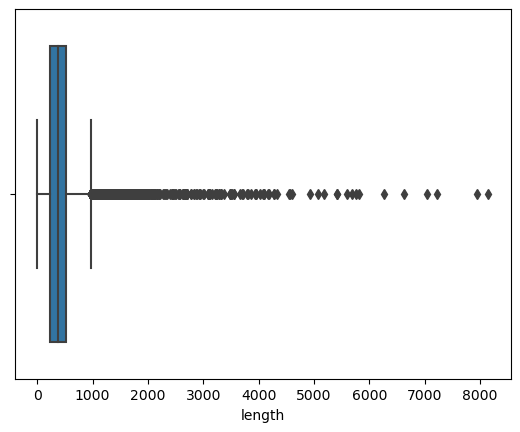

In [27]:
sns.boxplot(x = df['length']);

In [28]:
len(df[df['length'] > 1000])

1162

From the above figures, we can clearly see that there are outliers that need to be handled, we'll deal with them later using MinMaxScaler to range the length values between 0 and 1.

In [29]:
def count_plot(col, ax):
    '''
    Generate a count plot for a specified column.
    
    Args:
        col (pandas.Series or list): The column to be plotted.
        ax (matplotlib.axes.Axes, optional): The axes on which to draw the plot. 
            If not provided, a new figure and axes will be created.

    Returns:
        matplotlib.axes.Axes: The axes object containing the count plot.

    '''
    
    sns.countplot(x=col,palette = 'PuRd', alpha = 0.9, ax=ax)
    ax.tick_params(rotation = 30)
    axes[0].set_title('True subjects')
    axes[1].set_title('Fake subjects')
    plt.tight_layout()

1    21196
0    17462
Name: class, dtype: int64

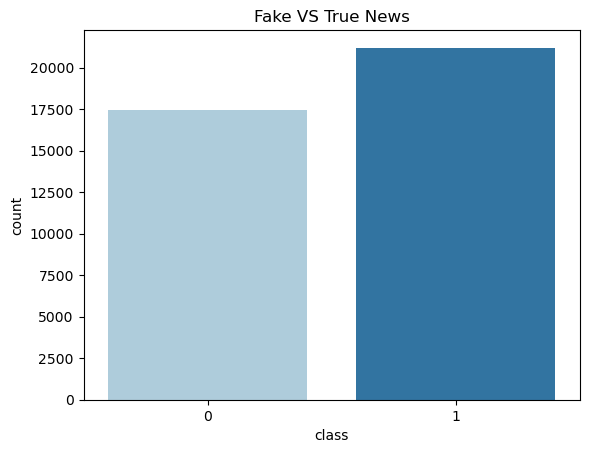

In [30]:
sns.countplot(x = df['class'], palette ='Paired')
plt.title('Fake VS True News')
df['class'].value_counts()

Data is balanced, hence, we can use accuracy as a performance measure.

In [31]:
# Saving the dataframe so we don't get different results in every run
df.to_csv('merged.csv', index=False)
df = pd.read_csv('merged.csv')

# Splitting the dataset to ensure no biased predictions

In [32]:
df = pd.read_csv('merged.csv')

In [33]:
from sklearn.model_selection import train_test_split

X = df[['text', 'length']]

y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((21648, 2), (21648,), (11598, 2), (11598,), (5412, 2), (5412,))

In [35]:
X_train[:3]

,text,length
22651,Trump’s Spokeswoman FLIPS OUT On CNN: ‘It Was...,566
33305,IAEA says North Korea's rapid weapons progress...,322
18753,Catalan leader backs mediation to resolve regi...,173


# Text preprocessing

In [36]:
#Load spaCy pipeline
nlp = spacy.load("en_core_web_sm")

In [37]:
def word_processing(text: str):
    '''
    Preprocess a text by applying several transformations.

    The transformations include:
    - Conversion to lowercase
    - Removal of hyperlinks
    - Removal of special characters
    - Removal of numbers
    - Removal of single letters
    - Removal of multiple spaces

    Args:
        text (str): The input text to be processed.

    Returns:
        text (str): The processed text.
    '''
    sent = []
    doc = nlp(text)
    for word in doc:
        # Check if the word is a stop word or punctuation and skip it
        if not word.is_stop and not word.is_punct:
            sent.append(word.lemma_)
    
    text = ' '.join(sent)

    # Converting tokens to lowercase
    text = text.lower()

    # Removes hyperlinks from text
    text = re.sub('https?://[^\s]+', '', text) 
    
    # Removes special characters except whitespaces & replaces it with whitespaces
    text = re.sub('[^a-zA-Z\s-]+', "", text)   

    # Removes 'www' from text and replaces it with whitespace.   
    text = re.sub("www", ' ', text) 
    
    # Removes single-letters that are surrounded by whitespaces on both sides.
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) 
    
    # Replaces multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)    
    
    return text

In [38]:
%%time
X_train['text'] =  X_train['text'].apply(word_processing)

CPU times: user 17min 23s, sys: 236 ms, total: 17min 23s
Wall time: 17min 25s


In [39]:
# Checking the cleaning output on a random article
X_train['text'].iloc[2]

'catalan leader back mediation resolve regional crisis barcelona reuters catalan regional leader carles puigdemont say wednesday favor mediation find way catalan crisis spanish government accept moment call mediation receive offer hour receive know ready start mediation process say televise address repeat time necessary dialogue agreement political culture people state give positive answer offer say catalan parliament expect unilaterally declare independence spain monday referendum spanish government court declare illegal sure day good country institution catalonia apply result referendum puigdemont say'

In [40]:
def pos_tagging(text):
    '''
    Performs part-of-speech tagging on a given text using spaCy.

    Args:
        text (list[str]): A list of texts to be processed.

    Returns:
        list[dict]: A list of dictionaries containing the part-of-speech tags for each token in the text.
    '''
    
    docs = list(nlp.pipe(text))
    
    tokens = [token.text for token in docs]

    pos_tags = [{token.text: token.pos_ for token in doc} for doc in docs]
    
    return pos_tags

In [41]:
%%time
pos_tags = pos_tagging(X_train['text'])

CPU times: user 6min 10s, sys: 4.18 s, total: 6min 14s
Wall time: 6min 16s


In [42]:
# Checking the results
pos_tags[:2]

[{' ': 'SPACE',
  'trump': 'VERB',
  'spokeswoman': 'NOUN',
  'flip': 'VERB',
  'cnn': 'PROPN',
  'complete': 'ADJ',
  'misspeak': 'NOUN',
  'video': 'NOUN',
  'donald': 'NOUN',
  'ignite': 'PROPN',
  'firestorm': 'PROPN',
  'wednesday': 'PROPN',
  'tell': 'VERB',
  'msnbc': 'PROPN',
  'chris': 'PROPN',
  'matthew': 'PROPN',
  'abortion': 'NOUN',
  'ban': 'NOUN',
  'woman': 'NOUN',
  'punish': 'NOUN',
  'have': 'AUX',
  'realize': 'VERB',
  'people': 'NOUN',
  'lid': 'PROPN',
  'backtrack': 'PROPN',
  'say': 'VERB',
  'mean': 'VERB',
  'doctor': 'NOUN',
  'campaign': 'NOUN',
  'katrina': 'PROPN',
  'pierson': 'NOUN',
  'add': 'VERB',
  'controversy': 'NOUN',
  'yell': 'VERB',
  'anchor': 'PROPN',
  'alisyn': 'PROPN',
  'camerota': 'NOUN',
  'thursday': 'PROPN',
  'morning': 'NOUN',
  'repeat': 'VERB',
  'word': 'NOUN',
  'verbatim': 'ADJ',
  'interview': 'NOUN',
  'visibly': 'ADV',
  'angry': 'ADJ',
  'ask': 'VERB',
  'want': 'VERB',
  'host': 'NOUN',
  'boss': 'NOUN',
  'call': 'NOUN'

In [43]:
# printing most frequent POS tags and its count

word_pos_pairs = [(word, pos_tag) for doc in pos_tags for word, pos_tag in doc.items()]

word_counts = Counter(word for word, _ in word_pos_pairs)
pos_tag_counts = Counter(pos_tag for _, pos_tag in word_pos_pairs)

print("Most frequent POS tags:")

for pos_tag, count in pos_tag_counts.most_common(10):
    print(pos_tag, count)


Most frequent POS tags:
NOUN 1248746
PROPN 804039
VERB 479572
ADJ 419935
ADV 106074
ADP 16144
AUX 12070
NUM 11450
PRON 6610
INTJ 6176


In [44]:
def word_cloud(text_col):
    '''
    Generate a word cloud from a column of text.    
    
    Args: 
        text_col: (pandas.Series or list): The column of text from which the word cloud will be generated.
    
    Returns:
        matplotlib.figure.Figure: The generated word cloud figure.
    '''
    text = ' '.join(text_col)
    
    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


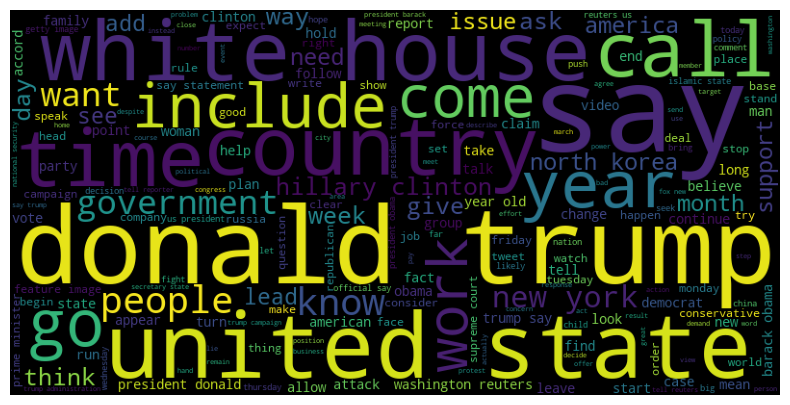

In [45]:
word_cloud(X_train['text'])

# Feature extraction

In [46]:
# handling length outliers

scaler = MinMaxScaler()

train_length_scaled = scaler.fit_transform(X_train['length'].values.reshape(-1,1))

test_length_scaled = scaler.transform(X_test['length'].values.reshape(-1,1))

val_length_scaled = scaler.transform(X_val['length'].values.reshape(-1,1))

## TF-IDF vectorizer



It is a measure of the originality of a word by comparing the number of times a word appears in a document with the number of documents the word appears in. 

In [47]:
tfidf_vec = TfidfVectorizer(
    ngram_range=(1,2),
    stop_words ='english',
    min_df = 0.04,
    max_df = 0.09)

X_train_tfidf = tfidf_vec.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vec.transform(X_test['text'])
X_val_tfidf = tfidf_vec.transform(X_val['text'])

In [48]:
X_train_tfidf, X_test_tfidf, X_val_tfidf

(<21648x512 sparse matrix of type '<class 'numpy.float64'>'
 	with 645067 stored elements in Compressed Sparse Row format>,
 <11598x512 sparse matrix of type '<class 'numpy.float64'>'
 	with 257662 stored elements in Compressed Sparse Row format>,
 <5412x512 sparse matrix of type '<class 'numpy.float64'>'
 	with 121244 stored elements in Compressed Sparse Row format>)

In [49]:
vocab = tfidf_vec.get_feature_names_out()
vocab[:30:2]

array(['able', 'accept', 'account', 'activity', 'admit', 'agenda',
       'agreement', 'aide', 'air', 'allegation', 'ally', 'apparently',
       'approach', 'april', 'argue'], dtype=object)

## BoW Vectorizer

The bag-of-words representation using a count vectorizer counts the number of times each word appears in the text. Resulting in a sparse matrix representation where each row represents a document and each column represents a unique word in the corpus, disregarding the order of the words and focusing on the frequency of word occurrences in each document.

In [50]:
count_vec = CountVectorizer(ngram_range=(1,2), 
                            preprocessor = word_processing,
                            min_df = 0.04,
                            max_df = 0.09)

X_train_bow = count_vec.fit_transform(X_train['text'])

X_test_bow = count_vec.transform(X_test['text'])

X_val_bow = count_vec.transform(X_val['text'])

In [51]:
X_train_bow, X_test_bow, X_val_bow

(<21648x504 sparse matrix of type '<class 'numpy.int64'>'
 	with 633895 stored elements in Compressed Sparse Row format>,
 <11598x504 sparse matrix of type '<class 'numpy.int64'>'
 	with 333689 stored elements in Compressed Sparse Row format>,
 <5412x504 sparse matrix of type '<class 'numpy.int64'>'
 	with 156579 stored elements in Compressed Sparse Row format>)

In [52]:
vocab = count_vec.get_feature_names_out()
vocab[:30:2]

array(['able', 'accept', 'account', 'activity', 'admit', 'affect', 'ago',
       'ahead', 'aim', 'al', 'allege', 'answer', 'appeal', 'approve',
       'area'], dtype=object)

# Combining features

Now both tf-idf and BoW vectorizers result in sparse matrices, to combine their features with dense features (length) we will use sparse matrices.

In [53]:
tfidf_combined_train_matrix = sp.hstack((train_length_scaled, X_train_tfidf))

tfidf_combined_test_matrix = sp.hstack((test_length_scaled, X_test_tfidf))

tfidf_combined_val_matrix = sp.hstack((val_length_scaled, X_val_tfidf))

tfidf_combined_train_matrix, tfidf_combined_test_matrix, tfidf_combined_val_matrix


(<21648x513 sparse matrix of type '<class 'numpy.float64'>'
 	with 666711 stored elements in COOrdinate format>,
 <11598x513 sparse matrix of type '<class 'numpy.float64'>'
 	with 269259 stored elements in COOrdinate format>,
 <5412x513 sparse matrix of type '<class 'numpy.float64'>'
 	with 126656 stored elements in COOrdinate format>)

In [54]:
bow_combined_train_matrix = sp.hstack((train_length_scaled, X_train_bow))

bow_combined_test_matrix = sp.hstack((test_length_scaled, X_test_bow))

bow_combined_val_matrix = sp.hstack((val_length_scaled, X_val_bow))

bow_combined_train_matrix, bow_combined_test_matrix, bow_combined_val_matrix


(<21648x505 sparse matrix of type '<class 'numpy.float64'>'
 	with 655539 stored elements in COOrdinate format>,
 <11598x505 sparse matrix of type '<class 'numpy.float64'>'
 	with 345286 stored elements in COOrdinate format>,
 <5412x505 sparse matrix of type '<class 'numpy.float64'>'
 	with 161991 stored elements in COOrdinate format>)

# ML Models:

In [55]:
def model(classifier, hyperparameters = None):
    '''
    Trains and evaluates the specified classifier using TF-IDF and Bag-of-Words representations.

    Args:
        classifier (class): The classifier class to use.
        hyperparameters (dict or None, optional): Dictionary of hyperparameters for the classifier. Default is None.

    Returns:
        None
        
    '''
    
    if hyperparameters is not None:
        clf = classifier(**hyperparameters)
    else:
        clf = classifier()

    tfidf_fit = clf.fit(tfidf_combined_train_matrix, y_train)
    tfidf_test_pred = clf.predict(tfidf_combined_test_matrix)
    tfidf_test_score = clf.score(tfidf_combined_test_matrix, y_test)
    
    tfidf_val_pred = clf.predict(tfidf_combined_val_matrix)
    tfidf_val_score = clf.score(tfidf_combined_val_matrix, y_val)    
    
    bow_fit = clf.fit(bow_combined_train_matrix, y_train)
    bow_test_pred = clf.predict(bow_combined_test_matrix)
    bow_test_score = clf.score(bow_combined_test_matrix, y_test)
    
    bow_val_pred = clf.predict(bow_combined_val_matrix)
    bow_val_score = clf.score(bow_combined_val_matrix, y_val)
    
    print('TF-IDF: \n Test accuracy: {:.2f} \n Validation accuracy: {:.2f} \n'.format(tfidf_test_score, tfidf_val_score))
    print( 'BoW: \n Test accuracy: {:.2f} \n Validation accuracy: {:.2f}'.format(bow_test_score, bow_val_score))

In [56]:
model(MultinomialNB)

TF-IDF: 
 Test accuracy: 0.90 
 Validation accuracy: 0.90 

BoW: 
 Test accuracy: 0.88 
 Validation accuracy: 0.89


In [57]:
model(RandomForestClassifier)

TF-IDF: 
 Test accuracy: 0.91 
 Validation accuracy: 0.92 

BoW: 
 Test accuracy: 0.93 
 Validation accuracy: 0.93


In [58]:
model(PassiveAggressiveClassifier)

TF-IDF: 
 Test accuracy: 0.90 
 Validation accuracy: 0.90 

BoW: 
 Test accuracy: 0.89 
 Validation accuracy: 0.89


In [59]:
estimators=[('mnb', MultinomialNB()),
            ('svc', SVC(kernel="linear")),
            ('rf', RandomForestClassifier()),
            ('pa', PassiveAggressiveClassifier())]
hyperparameters = {'estimators' : estimators}

model(VotingClassifier, hyperparameters)

TF-IDF: 
 Test accuracy: 0.92 
 Validation accuracy: 0.92 

BoW: 
 Test accuracy: 0.93 
 Validation accuracy: 0.93


In [60]:
def evaluate(test_set, test_set_labels):
    '''
    Evaluate the performance of a classification model.

    This function calculates the accuracy, classification report, and confusion matrix
    based on the provided actual and predicted labels. It also plots a heatmap of the
    confusion matrix.

    Args:
        actual_labels (array-like): The true labels of the data.
        predicted_labels (array-like): The predicted labels from the model.

    Returns:
        None

    '''
    # Classifier
    clf = VotingClassifier(estimators)
    clf.fit(bow_combined_train_matrix, y_train)
    
    # Calculate and print classification report
    predictions = clf.predict(test_set)
    report = classification_report(test_set_labels, predictions)
    print("Classification Report: {}".format(report))

    # Compute the confusion matrix
    cf_matrix = confusion_matrix(test_set_labels, predictions)
    
    # Define labels for the heatmap
    categories = ['negative', 'positive']
    total_samples = np.sum(cf_matrix)
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / total_samples]
    labels = ['{}\n{}'.format(name, percentage) for name, percentage in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cf_matrix, annot=labels, cmap='Purples_r', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 14}, pad=20)
    plt.show()

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.95      0.93      5290
           1       0.95      0.92      0.94      6308

    accuracy                           0.93     11598
   macro avg       0.93      0.93      0.93     11598
weighted avg       0.93      0.93      0.93     11598



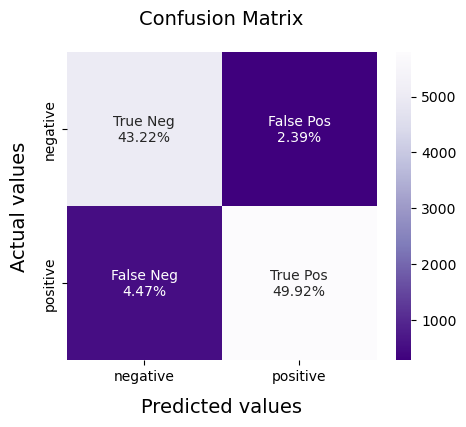

In [61]:
evaluate(bow_combined_test_matrix, y_test)

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.95      0.93      2422
           1       0.96      0.91      0.94      2990

    accuracy                           0.93      5412
   macro avg       0.93      0.93      0.93      5412
weighted avg       0.93      0.93      0.93      5412



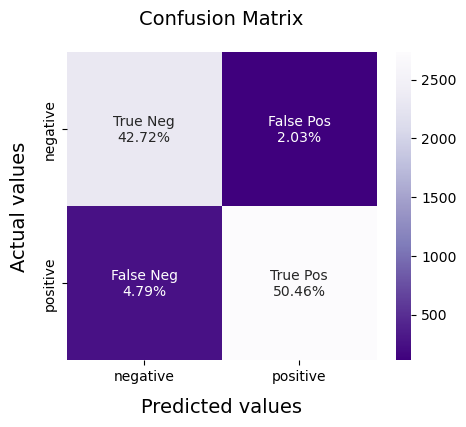

In [62]:
evaluate(bow_combined_val_matrix, y_val)